# Importing the Libraries

In [107]:
import numpy as np
import pandas as pd
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# Data Collection & Pre-Processing

In [108]:
# Loading the data from csv file to a pandas DataFrame
data = pd.read_csv("/content/drive/MyDrive/ProjectGIT/spam.csv",encoding='latin-1')

In [109]:
print(data)

     category                                            message Unnamed: 2  \
0         ham  Go until jurong point, crazy.. Available only ...        NaN   
1         ham                      Ok lar... Joking wif u oni...        NaN   
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3         ham  U dun say so early hor... U c already then say...        NaN   
4         ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...       ...                                                ...        ...   
5567     spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568      ham              Will ?_ b going to esplanade fr home?        NaN   
5569      ham  Pity, * was in mood for that. So...any other s...        NaN   
5570      ham  The guy did some bitching but I acted like i'd...        NaN   
5571      ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN       

In [110]:
# Replace the null values with a null string
data = data.where((pd.notnull(data)),'')

In [111]:
#Printing the first 5 rows of the dataframe
data.head()

,category,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",,,
1,ham,Ok lar... Joking wif u oni...,,,
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,,,
3,ham,U dun say so early hor... U c already then say...,,,
4,ham,"Nah I don't think he goes to usf, he lives aro...",,,


In [112]:
# Checking the number of rows and columns in the dataframe
data.shape

(5572, 5)

In [113]:
data.columns

Index(['category', 'message', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [114]:
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1)

,category,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ?_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# Label Encoding

Ham = 1

Spam = 0

In [115]:
# Adding one more column with the name spam.
# Here if a mail is spam it will print 0 else 1.
data['spam'] = data['category'].map({'spam': 0, 'ham': 1}).astype(int)

In [116]:
data['category'].value_counts()

ham     4825
spam     747
Name: category, dtype: int64

In [117]:
data.isnull().sum()

category      0
message       0
Unnamed: 2    0
Unnamed: 3    0
Unnamed: 4    0
spam          0
dtype: int64

We can see that our dataset contains 5572 rows, in which 4825 are ham and 747 mails are spam mails. Moreover, our dataset does not contain any null or 0 values.

In [118]:
data['category'] = data['category'].replace(['ham'],'non-spam')

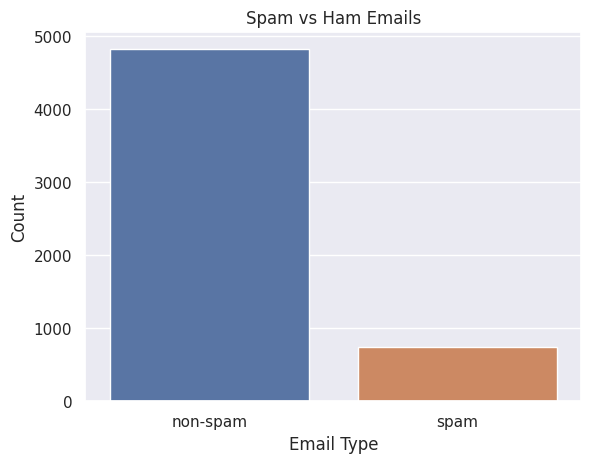

In [119]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")  # Set the style of the plot

# Create a countplot to visualize the distribution of spam and ham emails
sns.countplot(data=data, x='category')

# Set the labels and title of the plot
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.title('Spam vs Ham Emails')

# Display the plot
plt.show()


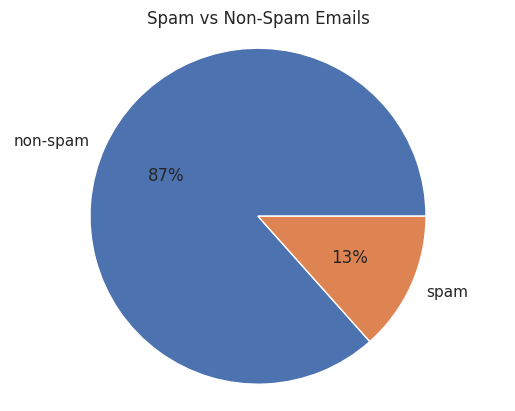

In [120]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'ham' with 'non-spam' in the 'category' column
data['category'] = data['category'].replace(['ham'], 'non-spam')

# Count the occurrences of each category
category_counts = data['category'].value_counts()

# Create a pie chart
plt.pie(category_counts, labels=category_counts.index, autopct='%.0f%%')

# Set the title of the plot
plt.title('Spam vs Non-Spam Emails')

# Set the aspect ratio to make the pie chart round
plt.axis('equal')

# Display the plot
plt.show()


# Tokenization

Tokenization stands for splitting up of data into tokens, that is comma seperated values.

In [121]:
data['message'][1]

'Ok lar... Joking wif u oni...'

In [122]:
def tokenizer(message):
    return message.split()

In [123]:
data['message'] = data['message'].apply(tokenizer)

In [124]:
data['message'][1]

['Ok', 'lar...', 'Joking', 'wif', 'u', 'oni...']

# Stemming

Stemming is the process of removing of suffix to convert the word into core values. For example, converting waits, waiting, waited to the core word wait.


There are different stemmers in the package such as snowball, porter, lancaster, etc. I will be using Snowball.

In [125]:
porter = SnowballStemmer("english", ignore_stopwords=False)

In [126]:
def stem_it(message):
    return [porter.stem(word) for word in message]

In [127]:
data['message'] = data['message'].apply(stem_it)

In [128]:
data['message'][1]

['ok', 'lar...', 'joke', 'wif', 'u', 'oni...']

# Lemmitization

It is the process of finding lemma of a word depending on their meaning. It aims to remove inflectional endings. It helps in returning the base or dictionary form of a word, which is known as lemma. For example, converting is, am, was, are to the lemma word be.

Difference between Stemming and Lemmitization is that stemming can often create non-existent words, whereas lemmas are actual words.

In [129]:
data['message'][153]

['as',
 'per',
 'your',
 'request',
 'mell',
 'mell',
 '(oru',
 'minnaminungint',
 'nurungu',
 'vettam)',
 'has',
 'been',
 'set',
 'as',
 'your',
 'callertun',
 'for',
 'all',
 'callers.',
 'press',
 '*9',
 'to',
 'copi',
 'your',
 'friend',
 'callertun']

In [130]:
lemmitizer = WordNetLemmatizer()


In [131]:
def lemmit_it(message):
    return [lemmitizer.lemmatize(word, pos = 'a') for word in message]

In [132]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [133]:

data['message'] = data['message'].apply(lemmit_it)

In [134]:
data['message'][153]

['as',
 'per',
 'your',
 'request',
 'mell',
 'mell',
 '(oru',
 'minnaminungint',
 'nurungu',
 'vettam)',
 'has',
 'been',
 'set',
 'as',
 'your',
 'callertun',
 'for',
 'all',
 'callers.',
 'press',
 '*9',
 'to',
 'copi',
 'your',
 'friend',
 'callertun']

# TEXT NORMALIZATION:

When we normalize a Natural Language resource, we attempt to reduce the randomness in it. Advantage of normalization :

*input variables get reduced

*it reduces the dimensionality of the input text

*it helps to deal with code-breaking inputs

*it helps in granting reliable extraction of statistics from our natural langauge inputs.

**StopWord Removal:**

It is used to remove common words such as is, an, the, etc. The search engine is programmed to ignore such words.

In [135]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [136]:
stop_words = stopwords.words('english')


In [137]:
def stop_it(message):
    review = [word for word in message if not word in stop_words]
    return review

In [138]:
data['message'] = data['message'].apply(stop_it)


In [139]:
data.head()


,category,message,Unnamed: 2,Unnamed: 3,Unnamed: 4,spam
0,non-spam,"[go, jurong, point,, crazy.., avail, onli, bug...",,,,1
1,non-spam,"[ok, lar..., joke, wif, u, oni...]",,,,1
2,spam,"[free, entri, 2, wkli, comp, win, fa, cup, fin...",,,,0
3,non-spam,"[u, dun, say, earli, hor..., u, c, alreadi, sa...",,,,1
4,non-spam,"[nah, think, goe, usf,, live, around, though]",,,,1


In [140]:
data['message'] = data['message'].apply(' '.join)


In [141]:
data.head()


,category,message,Unnamed: 2,Unnamed: 3,Unnamed: 4,spam
0,non-spam,"go jurong point, crazy.. avail onli bugi n gre...",,,,1
1,non-spam,ok lar... joke wif u oni...,,,,1
2,spam,free entri 2 wkli comp win fa cup final tkts 2...,,,,0
3,non-spam,u dun say earli hor... u c alreadi say...,,,,1
4,non-spam,"nah think goe usf, live around though",,,,1


# Vectorization

It is the method to convert messageual data into numeric format. Since computers are unable to understand messageual data, hence we need to convert message into numerical format.

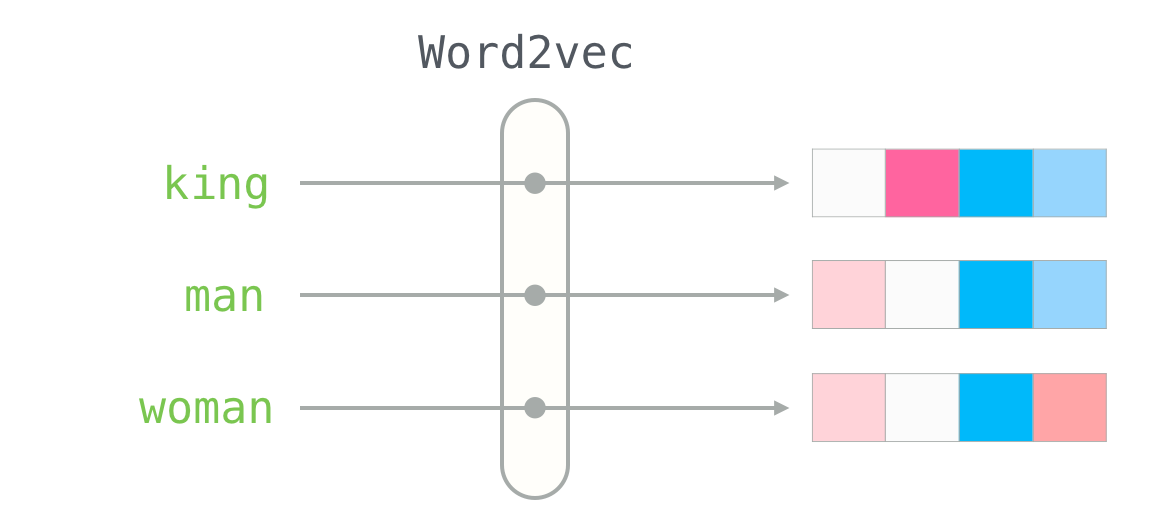



I will be using TfidataVectorizer for the same, that is Term Frequency-Inverse Document Frequency.

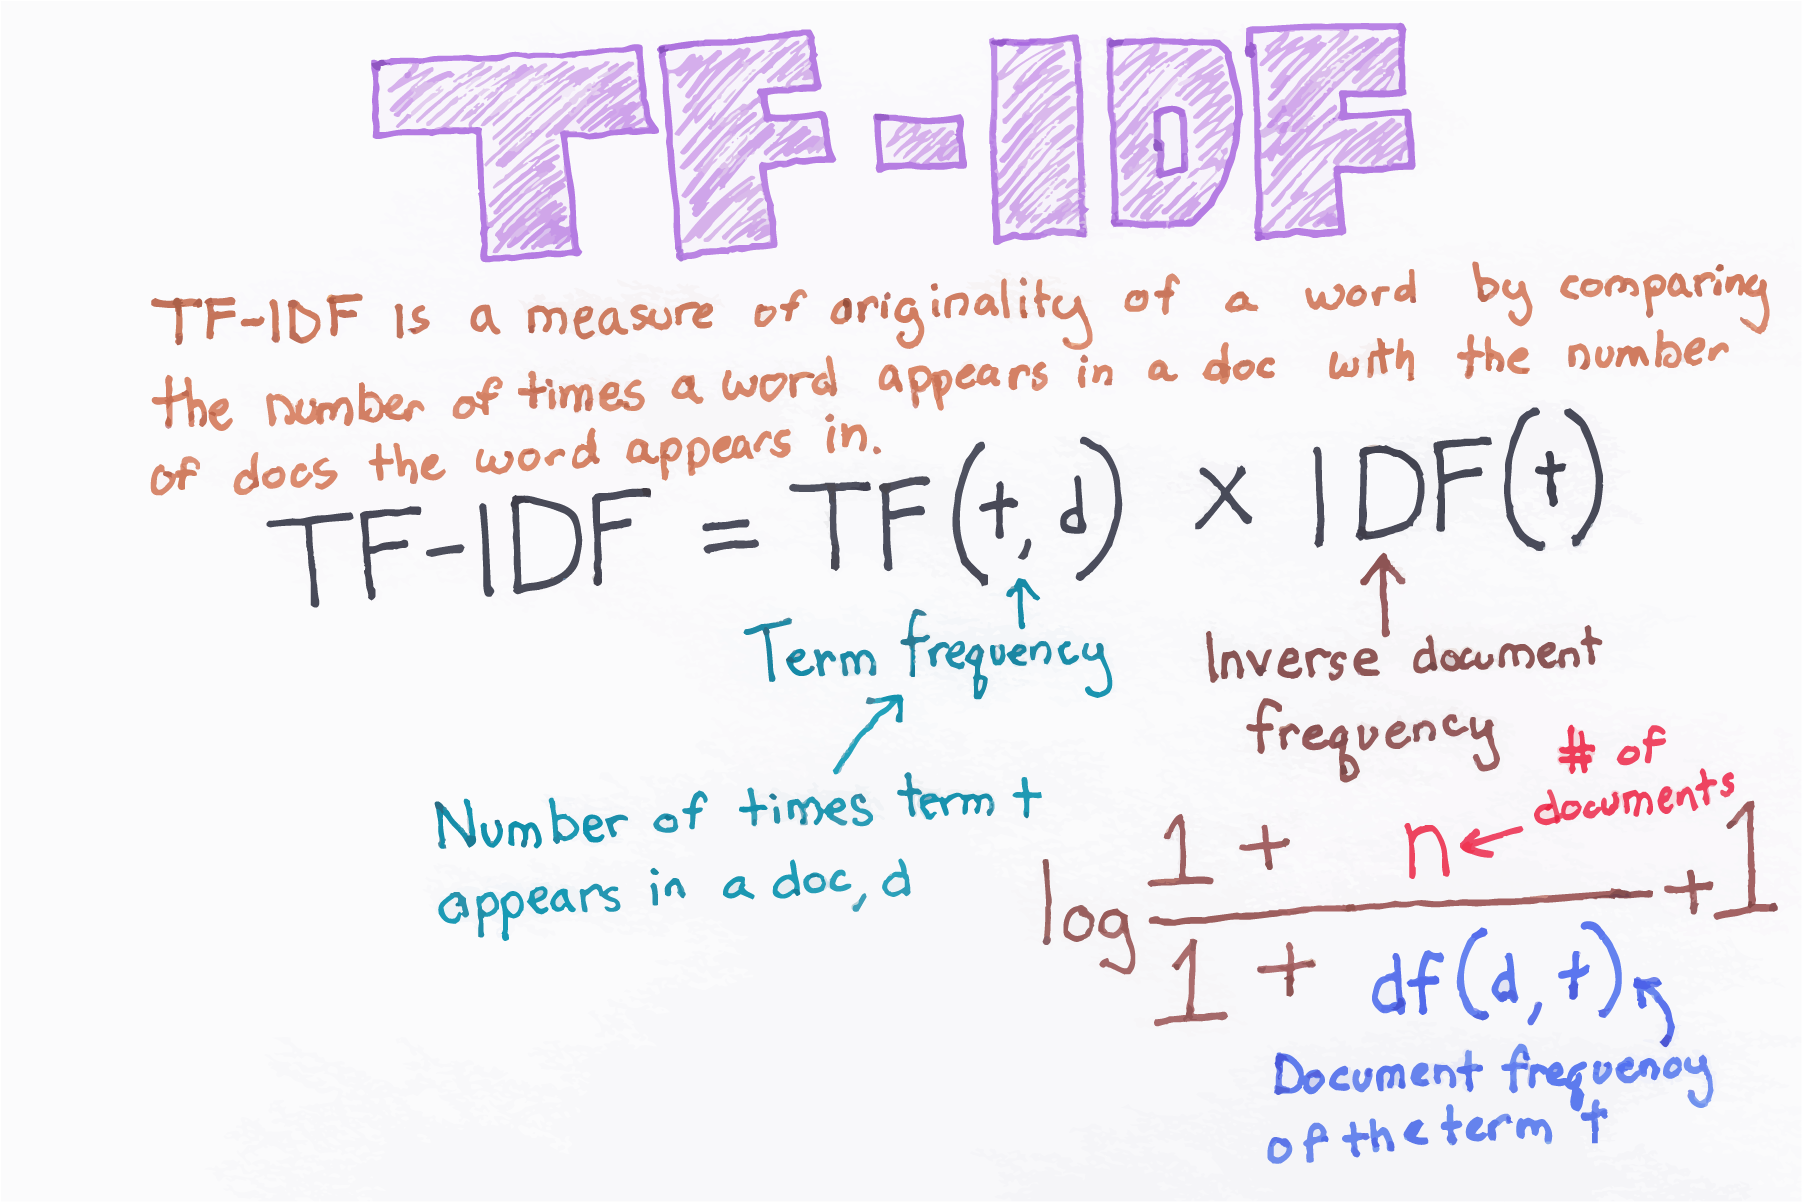

**TF ( term frequency):**  Denotes the contribution of the word to the document ie words relevant to the document should be frequent.

TF = (Number of times term t appears in a document)/(Number of terms in the document)

**IDF (Inverse Document Frequency):** If a word has appeared in all the document then probably that words is not relevsnt to a particular document but if it has appeard in subset of documents them probably the word is of some relevance to the documents it is present in

IDF = log(N/n) where N is the number of documents and n is the number of documents a term t has appeared in.

In [142]:
tfidata = TfidfVectorizer()
y = data.spam.values
x = tfidata.fit_transform(data['message'])

In [143]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.2, shuffle = False)

In [144]:
data.head()

,category,message,Unnamed: 2,Unnamed: 3,Unnamed: 4,spam
0,non-spam,"go jurong point, crazy.. avail onli bugi n gre...",,,,1
1,non-spam,ok lar... joke wif u oni...,,,,1
2,spam,free entri 2 wkli comp win fa cup final tkts 2...,,,,0
3,non-spam,u dun say earli hor... u c alreadi say...,,,,1
4,non-spam,"nah think goe usf, live around though",,,,1


# Training the Model

Logistic Regression

In [145]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred  = lr.predict(x_test)

In [146]:
acc_log = accuracy_score(y_pred, y_test)*100
print("Accuracy is ", acc_log)

Accuracy 96.05381165919282


# **LinearSVC Accuracy**

In [147]:
svc = LinearSVC(random_state=0)
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)

In [148]:
acc_svc = accuracy_score(y_pred, y_test)*100
print("Accuracy", acc_svc)

Accuracy 97.75784753363229


# Predictive Model

Since, the accuracy of LinearSVC is slightly better than Logistic Regression, I will be using LinearSVC to make the predictive model.

In [168]:
input_mail = [" I?? going to try for 2 months ha ha only joking"]

transformed_data = tfidata.transform(input_mail)

prediction = svc.predict(transformed_data)

if (prediction == 0):
    print("\nSpam mail")
else:
    print("\nHam mail")


Ham mail
